Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as mno # needed to visualize missing values. install missingno into conda if import does not work!
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import warnings
from sklearn.model_selection import train_test_split


warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Read Data

In [2]:
# Declare variables
data  = '..\\data\\'
# File names
top_songs_file = 'songs_normalize.csv'
million_songs_file = 'tracks_features.csv'
# Declare both dataframes
df_top_songs = pd.read_csv(data+top_songs_file)
df_million_songs = pd.read_csv(data+million_songs_file)

# Data Structure and preparation

In [3]:
df_top_songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [4]:
df_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
df_million_songs

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [6]:
df_million_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

Find top songs in million songs data

In [7]:
df_million_songs[df_million_songs['name'] == 'Oops!...I Did It Again']

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
18821,6btHdKjLcF97GoGtO0My7F,Oops!...I Did It Again,Greatest Hits: My Prerogative,574xhx2X0G9MkqACxqi4cg,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],4,1,False,0.752,...,0.0447,0.3010,0.000025,0.213,0.846,95.058,212613,4.0,2004,2004
267236,5dtelqyIulSu1zfjUjbkOD,Oops!...I Did It Again,Funk Walker,7o7yNufWDKJX79jW4fyWCE,"['Scary Pockets', 'India Carney']","['1e16kiJQtCTveTl7TQnkFN', '1P3aWqFIk6jRJ2Ipxl...",1,1,False,0.686,...,0.1370,0.0501,0.000000,0.224,0.963,124.793,160000,4.0,2017,2017-09-24
455160,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,Oops!... I Did It Again,5PmgtkodFl2Om3hMXONDll,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],1,1,False,0.751,...,0.0437,0.3000,0.000018,0.355,0.894,95.053,211160,4.0,2000,2000-05-16


In [8]:
# Write first entry of artists back into the column 
# hoping that the first entry is always the main artist of the song found in the top song dataset)
df_million_songs['artists'] = df_million_songs.artists.apply(lambda x: eval(x)[0])
# rename columns to join on
df_top_songs.rename(columns = {'song':'name', 'artist':'artists'}, inplace = True)
# Add column to identify top songs
df_top_songs['top_song'] = 1
# keep only columns to join on and top song column
df_top_songs = df_top_songs[['name','artists','top_song']]
# join on song name and artist performing
df_merged = pd.merge(df_top_songs,df_million_songs, on=['name','artists'], how='right')
df_merged.head()


,name,artists,top_song,id,album,album_id,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,Testify,Rage Against The Machine,NaN,7lmeHLHBe4nmXzuXc0HDjk,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,Guerrilla Radio,Rage Against The Machine,NaN,1wsRitfRRtWyEapl0q22o8,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,Calm Like a Bomb,Rage Against The Machine,NaN,1hR0fIFK2qRG3f3RF70pb7,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,Mic Check,Rage Against The Machine,NaN,2lbASgTSoDO7MTuLAXlTW0,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,Sleep Now In the Fire,Rage Against The Machine,NaN,1MQTmpYOZ6fcMQc56Hdo7T,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [9]:
# show values of time signature column
df_merged['time_signature'].value_counts()

4.0    988672
3.0    162645
5.0     30493
1.0     19431
0.0      2809
Name: time_signature, dtype: int64

In [10]:
# show values of mode column
df_merged['mode'].value_counts()

1    808465
0    395585
Name: mode, dtype: int64

In [11]:
# set all missing top song identifiers to 0 if not 1
# change column to category type
df_merged['top_song'] = df_merged['top_song'].fillna(0)
df_merged['top_song'] = df_merged['top_song'].astype('int')
df_merged['top_song'] = df_merged['top_song'].astype('category')
# change time signature to category
df_merged['time_signature'] = df_merged['time_signature'].astype('int')
df_merged['time_signature'] = df_merged['time_signature'].astype('category')
# change mode to category
df_merged['mode'] = df_merged['mode'].astype('int')
df_merged['mode'] = df_merged['mode'].astype('category')
# change explicit to category
df_merged['explicit'] = df_merged['explicit'].astype('int')
df_merged['explicit'] = df_merged['explicit'].astype('category')
# change track number and disk number to category
df_merged['track_number'] = df_merged['track_number'].astype('category')
df_merged['disc_number'] = df_merged['disc_number'].astype('category')
# drop release date, artists id and album id column
df_merged = df_merged.drop(['release_date','album_id','artist_ids'], axis = 1)
# change remaining object types to category
for col in df_merged.columns:
    if df_merged[col].dtype == object:
        df_merged[col] = df_merged[col].astype('category')

In [12]:
df_merged.head()

,name,artists,top_song,id,album,track_number,disc_number,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,Testify,Rage Against The Machine,0,7lmeHLHBe4nmXzuXc0HDjk,The Battle Of Los Angeles,1,1,0,0.470,0.978,...,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999
1,Guerrilla Radio,Rage Against The Machine,0,1wsRitfRRtWyEapl0q22o8,The Battle Of Los Angeles,2,1,1,0.599,0.957,...,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999
2,Calm Like a Bomb,Rage Against The Machine,0,1hR0fIFK2qRG3f3RF70pb7,The Battle Of Los Angeles,3,1,0,0.315,0.970,...,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999
3,Mic Check,Rage Against The Machine,0,2lbASgTSoDO7MTuLAXlTW0,The Battle Of Los Angeles,4,1,1,0.440,0.967,...,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999
4,Sleep Now In the Fire,Rage Against The Machine,0,1MQTmpYOZ6fcMQc56Hdo7T,The Battle Of Los Angeles,5,1,0,0.426,0.929,...,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999


In [13]:
# find duplicate songs by the same artist and remove them from the dataframe
duplicateRows = df_merged[df_merged.duplicated(['name','artists'])]
df_merged = df_merged.drop(duplicateRows.index)

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126167 entries, 0 to 1204049
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   name              1126167 non-null  category
 1   artists           1126167 non-null  category
 2   top_song          1126167 non-null  category
 3   id                1126167 non-null  category
 4   album             1126167 non-null  category
 5   track_number      1126167 non-null  category
 6   disc_number       1126167 non-null  category
 7   explicit          1126167 non-null  category
 8   danceability      1126167 non-null  float64 
 9   energy            1126167 non-null  float64 
 10  key               1126167 non-null  int64   
 11  loudness          1126167 non-null  float64 
 12  mode              1126167 non-null  category
 13  speechiness       1126167 non-null  float64 
 14  acousticness      1126167 non-null  float64 
 15  instrumentalness  1126167 non-nu

In [15]:
df_merged[df_merged['top_song'] == 1]

,name,artists,top_song,id,album,track_number,disc_number,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
39,Leave Right Now,Will Young,1,4mZsyuthp695XQWwb2g3qe,Fridays Child,4,1,0,0.641,0.445,...,1,0.0368,0.14500,0.000000,0.1080,0.383,81.931,214733,4,2003
272,Mandy,Westlife,1,48jd71gnyIlLdXOYX2qJ6p,Turnaround,1,1,0,0.447,0.636,...,1,0.0278,0.25400,0.000092,0.1100,0.376,105.678,199320,4,2003
1430,Bye Bye Bye,*NSYNC,1,62bOmKYxYg7dhrC6gH9vFn,No Strings Attached,1,1,0,0.610,0.926,...,0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400,4,2000
1431,It's Gonna Be Me,*NSYNC,1,2AW37v0bDyuOzGP3XnmFuA,No Strings Attached,2,1,0,0.636,0.873,...,0,0.0710,0.04070,0.000001,0.0372,0.908,165.071,192427,4,2000
1885,Girlfriend,*NSYNC,1,6u5flhVFxKZrl9AApvf2SL,Celebrity,4,1,0,0.748,0.811,...,0,0.0907,0.08660,0.000014,0.0282,0.862,93.963,253600,4,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173108,"Dear Maria, Count Me In",All Time Low,1,0nEcDFFNqdmnbTiGy6RE2Y,"Dear Maria, Count Me In",1,1,0,0.459,0.895,...,1,0.0805,0.00725,0.000000,0.2060,0.572,181.040,182827,4,2009
1177875,How to Save a Life,The Fray,1,5fVZC9GiM4e8vu99W0Xf6J,How To Save A Life,3,1,0,0.640,0.743,...,1,0.0379,0.26900,0.000000,0.1010,0.361,122.035,262533,4,2005
1196157,So Am I,Ava Max,1,2Xnv3GntqbBH1juvUYSpHG,Heaven & Hell,14,1,0,0.681,0.657,...,1,0.0432,0.07480,0.000000,0.3530,0.628,130.089,183027,4,2020
1197491,"F**kin' Problems (feat. Drake, 2 Chainz & Kend...",A$AP Rocky,1,4X5f3vT8MRuXF68pfjNte5,LONG.LIVE.A$AP (Deluxe Version),7,1,1,0.853,0.693,...,1,0.2750,0.02390,0.000000,0.1100,0.662,95.967,233787,4,2013


Variable list and data splitting

In [16]:
# define outcome variable as y_label
y_label = 'top_song'
# select features
features = df_merged.drop(columns=[y_label]).columns.tolist()
# create feature data for data splitting
X = df_merged[features]
# create response for data splitting
y = df_merged[y_label]
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# data training set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

# Data Exploration

In [33]:
df_explore = df_train.copy()

list_num = df_explore.select_dtypes(include=[np.number]).columns.to_list()
list_num.append('track_number')
list_num.append('disc_number')
list_num.append('time_signature')

Descriptive Statistics

In [18]:
df_explore.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
danceability,788316.0,0.49,0.19,0.0,0.36,0.50,0.63,1.00
energy,788316.0,0.51,0.29,0.0,0.26,0.53,0.77,1.00
key,788316.0,5.20,3.54,0.0,2.00,5.00,8.00,11.00
loudness,788316.0,-11.73,6.91,-60.0,-15.10,-9.74,-6.70,7.12
speechiness,788316.0,0.09,0.12,0.0,0.04,0.04,0.07,0.97
acousticness,788316.0,0.44,0.38,0.0,0.04,0.38,0.86,1.00
instrumentalness,788316.0,0.28,0.38,0.0,0.00,0.01,0.72,1.00
liveness,788316.0,0.20,0.18,0.0,0.10,0.12,0.25,1.00
valence,788316.0,0.43,0.27,0.0,0.19,0.40,0.64,1.00
tempo,788316.0,117.74,30.93,0.0,94.16,116.87,137.19,248.93


In [19]:
q1 = df_explore.quantile(q = 0.25)
q3 = df_explore.quantile(q = 0.75)
iqr = q3-q1
iqr

danceability             0.275000
energy                   0.511000
key                      6.000000
loudness                 8.401000
speechiness              0.038100
acousticness             0.820800
instrumentalness         0.721992
liveness                 0.149000
valence                  0.451000
tempo                   43.032250
duration_ms         111755.500000
year                    12.000000
dtype: float64

Visual analysis

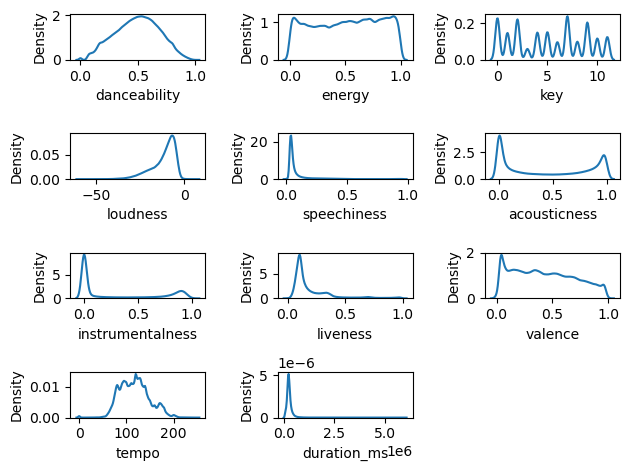

In [20]:
plt.subplot(4,3,1)
sns.kdeplot(data=df_merged, 
            x='danceability'
            )

plt.subplot(4,3,2)
sns.kdeplot(data=df_merged, 
            x='energy'
            )

plt.subplot(4,3,3)
sns.kdeplot(data=df_merged, 
            x='key'
            )

plt.subplot(4,3,4)
sns.kdeplot(data=df_merged, 
            x='loudness'
            )

plt.subplot(4,3,5)
sns.kdeplot(data=df_merged, 
            x='speechiness'
            )

plt.subplot(4,3,6)
sns.kdeplot(data=df_merged, 
            x='acousticness'
            )

plt.subplot(4,3,7)
sns.kdeplot(data=df_merged, 
            x='instrumentalness'
            )

plt.subplot(4,3,8)
sns.kdeplot(data=df_merged, 
            x='liveness'
            )

plt.subplot(4,3,9)
sns.kdeplot(data=df_merged, 
            x='valence'
            )

plt.subplot(4,3,10)
sns.kdeplot(data=df_merged, 
            x='tempo'
            )

plt.subplot(4,3,11)
sns.kdeplot(data=df_merged, 
            x='duration_ms'
            )

plt.tight_layout()
plt.show()

In [ ]:
alt.Chart(df_merged).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
).properties(title="Count of record per Feature")

In [21]:
# inspect correlation   
corr = df_merged.corr()
corr.style.background_gradient(cmap='Blues')

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
danceability,1.000000,0.270328,0.018152,0.366356,0.209316,-0.273867,-0.277434,-0.047034,0.559927,0.054129,-0.124911,0.063885
energy,0.270328,1.000000,0.034329,0.816370,0.126983,-0.793502,-0.241514,0.210736,0.394793,0.264572,-0.024962,0.140257
key,0.018152,0.034329,1.000000,0.020880,0.022876,-0.027917,-0.014661,0.004462,0.024464,0.005463,-0.004552,0.002958
loudness,0.366356,0.816370,0.020880,1.000000,0.056870,-0.669080,-0.385588,0.133931,0.381853,0.241129,-0.039555,0.169629
speechiness,0.209316,0.126983,0.022876,0.056870,1.000000,-0.077665,-0.169085,0.191293,0.100571,0.003981,-0.076388,0.054900
acousticness,-0.273867,-0.793502,-0.027917,-0.669080,-0.077665,1.000000,0.231008,-0.111786,-0.263114,-0.228523,-0.009843,-0.147082
instrumentalness,-0.277434,-0.241514,-0.014661,-0.385588,-0.169085,0.231008,1.000000,-0.118018,-0.280736,-0.067132,0.111945,-0.002877
liveness,-0.047034,0.210736,0.004462,0.133931,0.191293,-0.111786,-0.118018,1.000000,0.060818,0.027898,0.009413,-0.015381
valence,0.559927,0.394793,0.024464,0.381853,0.100571,-0.263114,-0.280736,0.060818,1.000000,0.172606,-0.184567,-0.056466
tempo,0.054129,0.264572,0.005463,0.241129,0.003981,-0.228523,-0.067132,0.027898,0.172606,1.000000,-0.015876,0.037878


[Text(0.5, 1.0, 'Multicolinearity Check')]

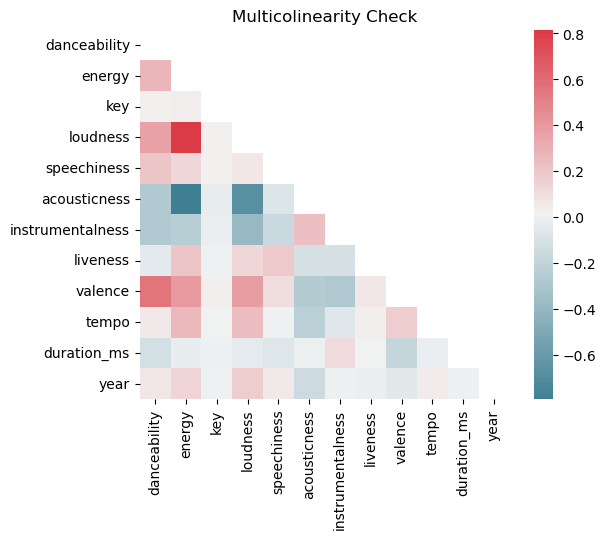

In [24]:
# visualize correlation matrix
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False,  square=True, annot_kws={"size": 12}).set(title="Multicolinearity Check")

Top song classification analysis

In [ ]:
data = {'Category 1': [30, 10], 'Category 2': [20, 20], 'Category 3': [50, 70]}
df = pd.DataFrame(data, index=['Group A', 'Group B'])

# plot 100% stacked bar chart
df_merged.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [38]:
df_merged

,name,artists,top_song,id,album,track_number,disc_number,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,Testify,Rage Against The Machine,0,7lmeHLHBe4nmXzuXc0HDjk,The Battle Of Los Angeles,1,1,0,0.470,0.978,...,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999
1,Guerrilla Radio,Rage Against The Machine,0,1wsRitfRRtWyEapl0q22o8,The Battle Of Los Angeles,2,1,1,0.599,0.957,...,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999
2,Calm Like a Bomb,Rage Against The Machine,0,1hR0fIFK2qRG3f3RF70pb7,The Battle Of Los Angeles,3,1,0,0.315,0.970,...,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999
3,Mic Check,Rage Against The Machine,0,2lbASgTSoDO7MTuLAXlTW0,The Battle Of Los Angeles,4,1,1,0.440,0.967,...,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999
4,Sleep Now In the Fire,Rage Against The Machine,0,1MQTmpYOZ6fcMQc56Hdo7T,The Battle Of Los Angeles,5,1,0,0.426,0.929,...,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204045,Gospel of Juke,FVLCRVM,0,0EsMifwUmMfJZxzoMPXJKZ,Notch - EP,2,1,0,0.264,0.966,...,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4,2014
1204046,Prism Visions,FVLCRVM,0,2WSc2TB1CSJgGE0PEzVeiu,Notch - EP,3,1,0,0.796,0.701,...,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4,2014
1204047,Tokyo 360,FVLCRVM,0,6iProIgUe3ETpO6UT0v5Hg,Notch - EP,4,1,0,0.785,0.796,...,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4,2014
1204048,Yummy!,FVLCRVM,0,37B4SXC8uoBsUyKCWnhPfX,Notch - EP,5,1,0,0.665,0.856,...,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4,2014


In [39]:
alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(mode)', stack="normalize"),
    y='top_song',
    color='mode'
)

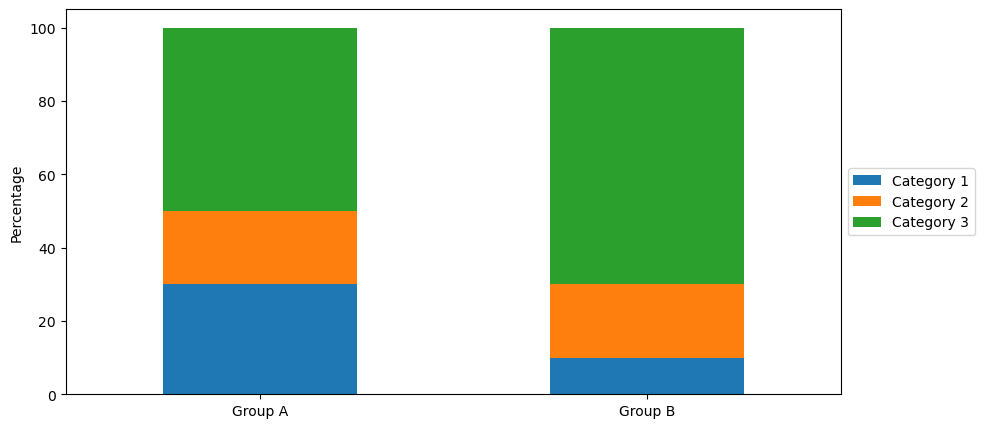

In [37]:
df_merged_mode = []
df = pd.DataFrame(data, index=['Group A', 'Group B'])

# plot 100% stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

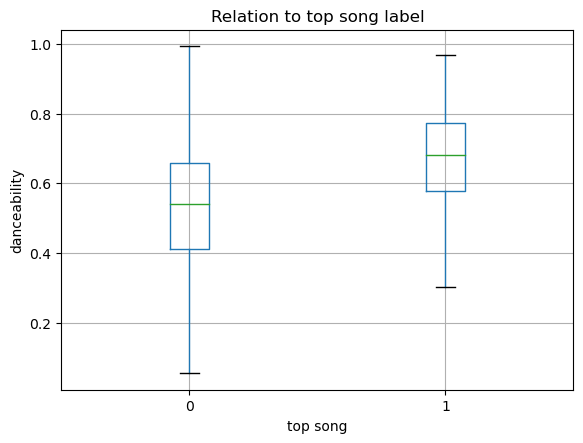

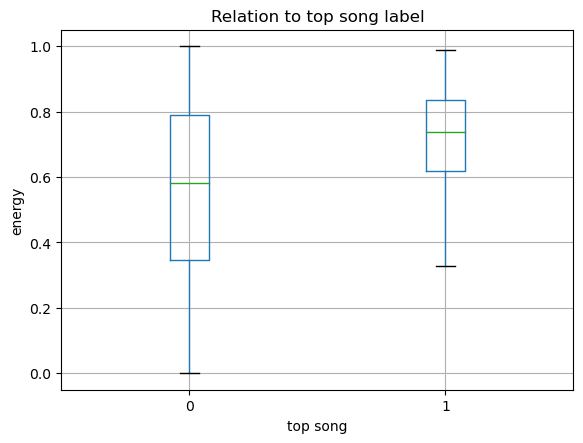

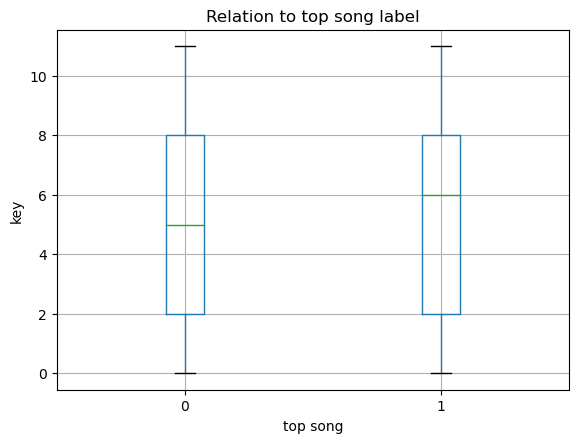

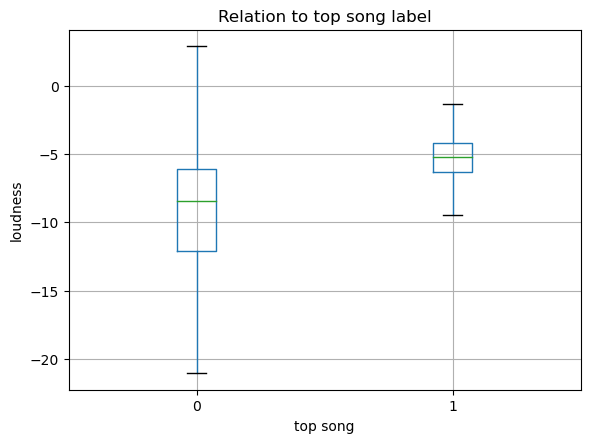

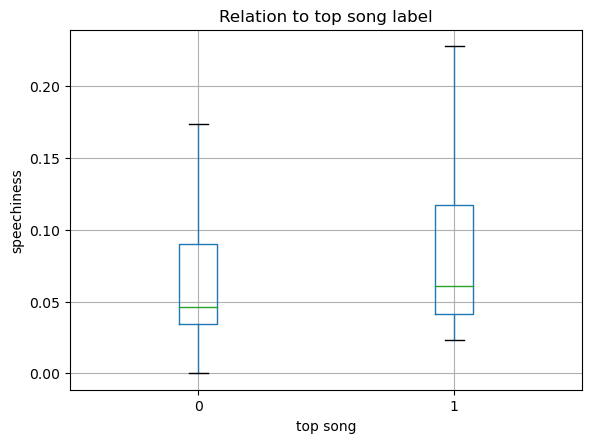

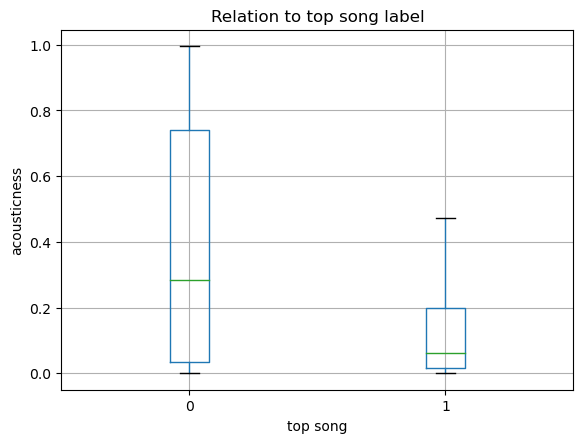

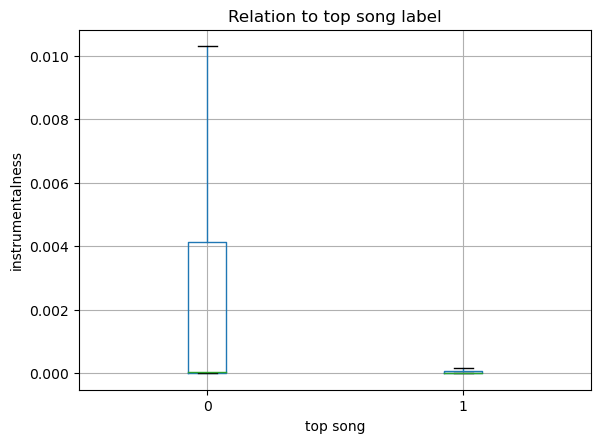

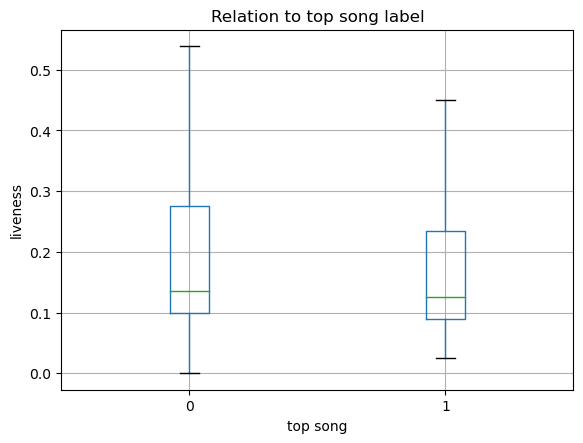

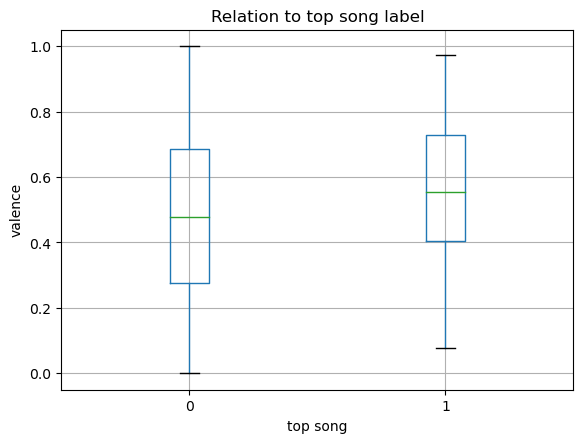

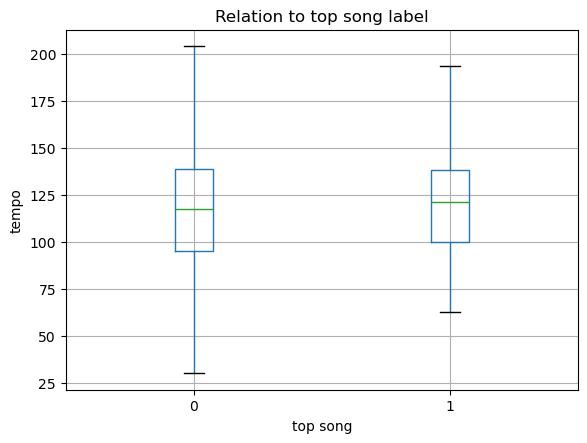

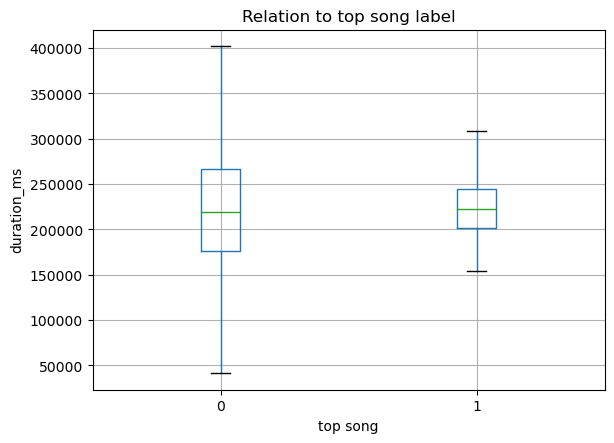

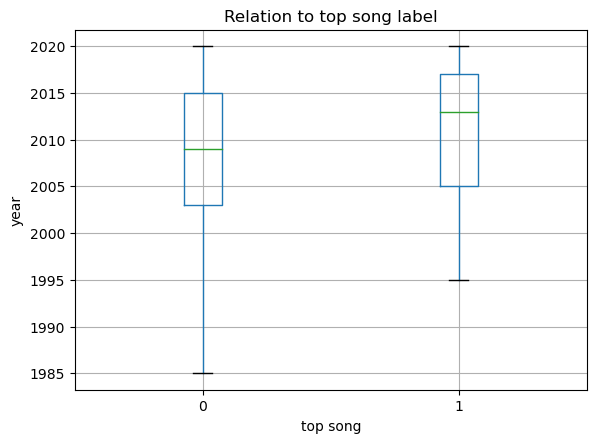

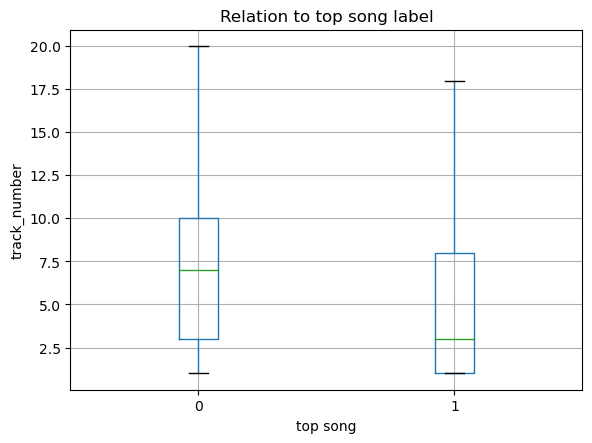

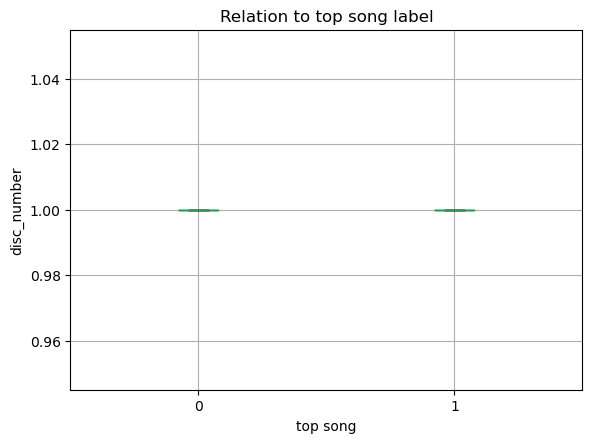

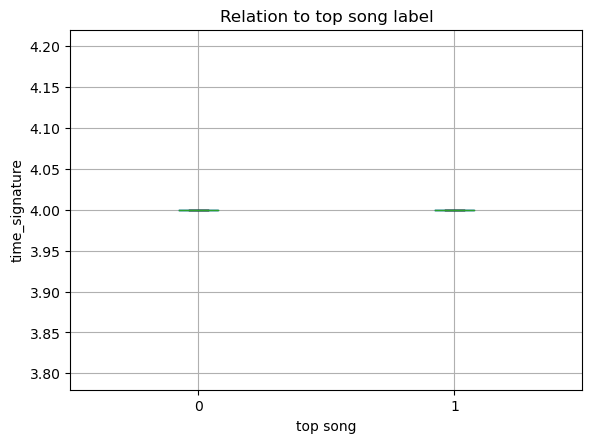

In [34]:
# Make a boxplot for every numerical variable in relation to top song label
def print_boxplot_float(df, y_var):
    df = df[(df['instrumentalness'] < 0.2)]
    
    ax = df.boxplot(column=y_var, by='top_song', showfliers=False)
    ax.set_title('Relation to top song label')
    ax.set_xlabel('top song')
    ax.set_ylabel(y_var)
    plt.suptitle('')

for col in list_num:
    print_boxplot_float(df_merged, col)
    plt.show()


First Results

* use million song dataset 
* Missing songs from top song dataframe should be added to million song dataframe  - only 537 songs from top song in million song dataframe labelled (join on artist and song name?)
* remove columns with ids for model
* keep either year or release date for model
* standard scale for numerical values 
* no outliers (tempo needs to be checked more because values of 0 dont make sense)
* some columns are identical, duplicates need to be filtered
* Energy and loudness have a strong positive correlation - drop one?
* valence and danceability also have a positive correlation - drop one?
* Acousticness and energy as well as loudness correlate strong negatively - drop one / both?
* danceability, loudness, energy seem to have strong impact on top song
* key could also be a factor
* interpret difference box plot year and track number - why is it this different?




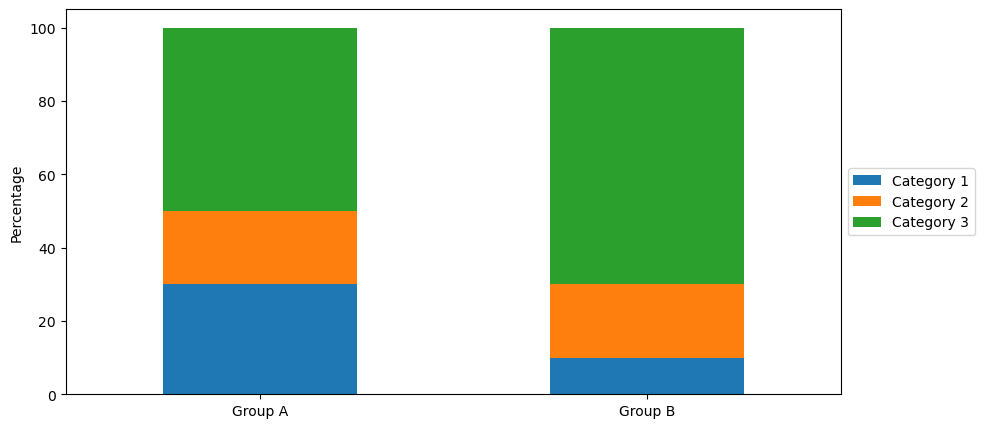